pod_data/PPS+15PTFE_60N_200RPM_30MINS_1.tsv


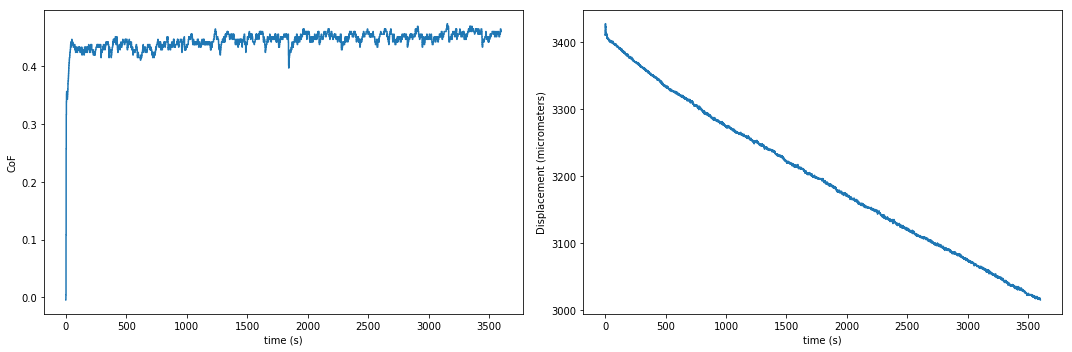

pod_data/PPS+30PTFE_100N_200RPM_30MINS_1.tsv


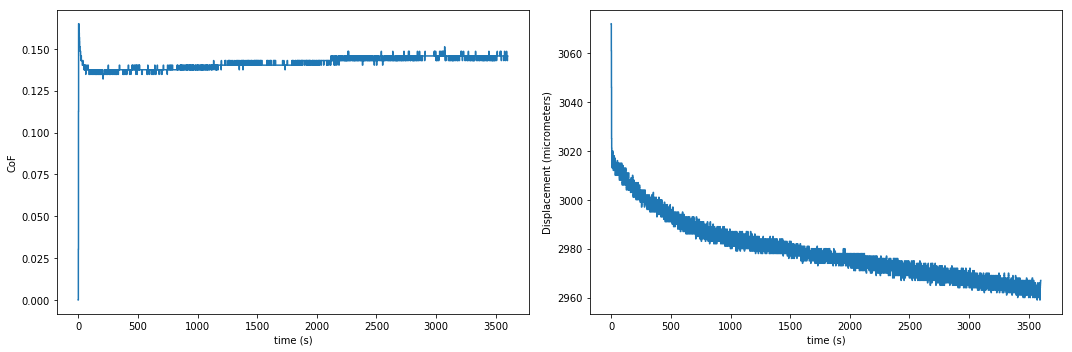

pod_data/PPS+30PTFE_100N_200RPM_30MINS_2.tsv


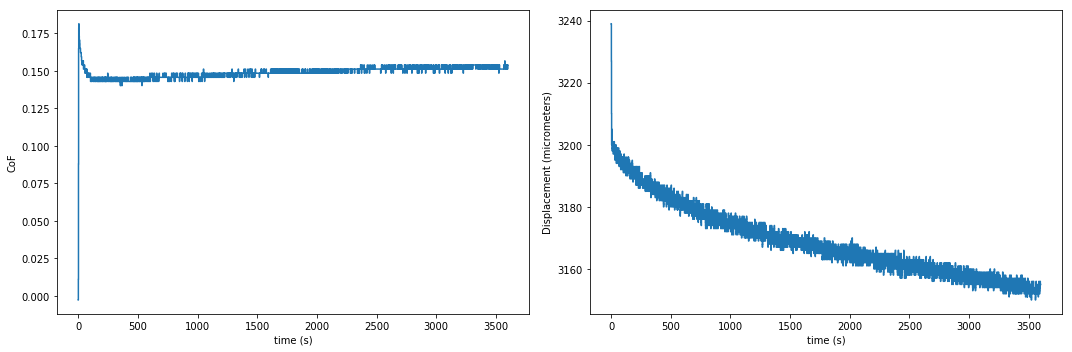

pod_data/PPS+30PTFE_60N_200RPM_30MINS_1.tsv


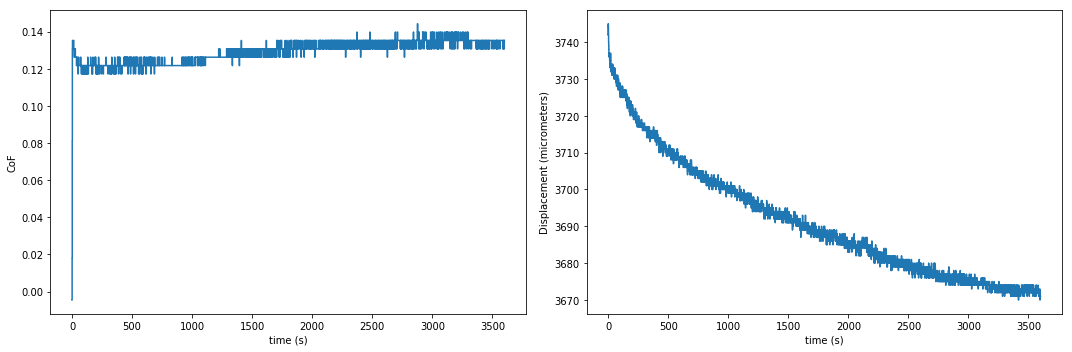

pod_data/PPS+30PTFE_60N_200RPM_30MINS_2.tsv


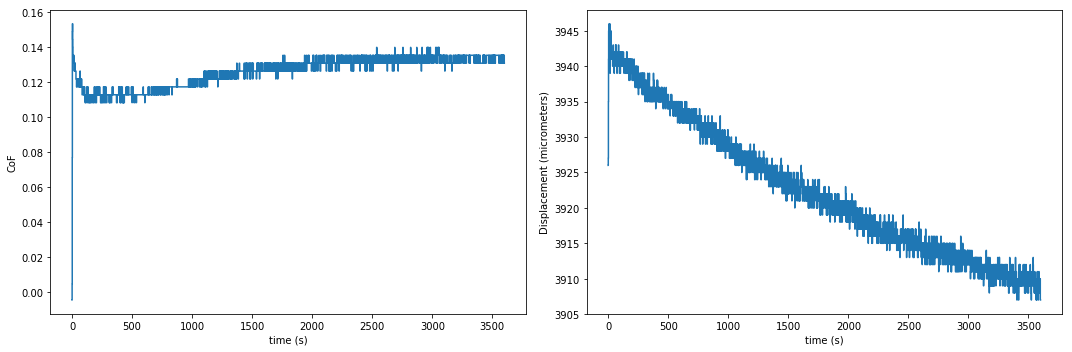

pod_data/PPS+45PTFE_100N_200RPM_30MINS_1.tsv


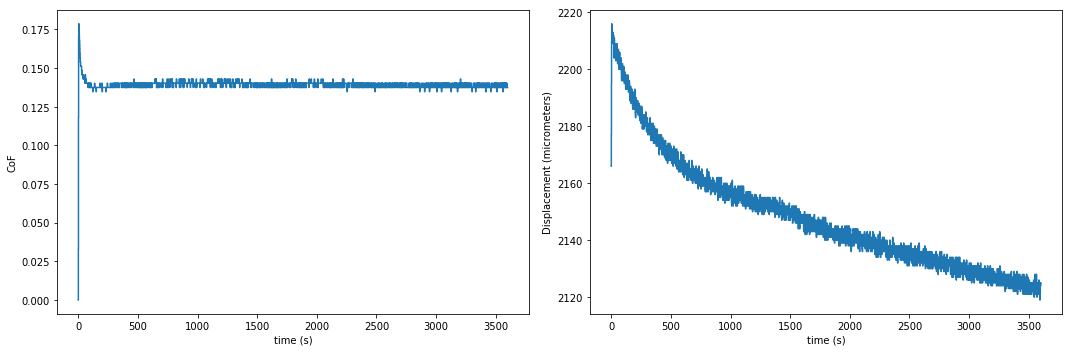

pod_data/PPS+45PTFE_100N_200RPM_30MINS_2.tsv


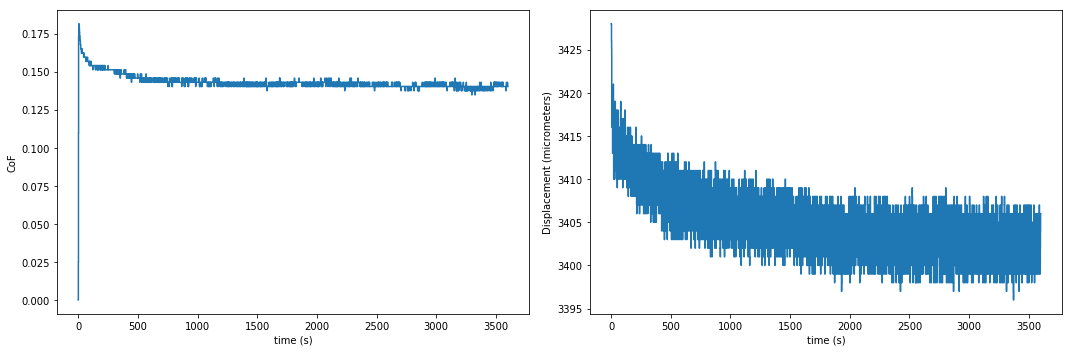

pod_data/PPS+45PTFE_60N_200RPM_30MINS_1.tsv


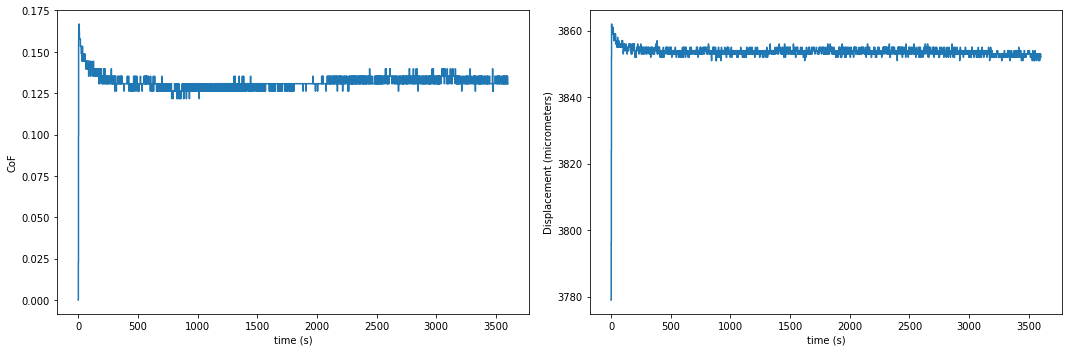

pod_data/PPS+45PTFE_60N_200RPM_30MINS_2.tsv


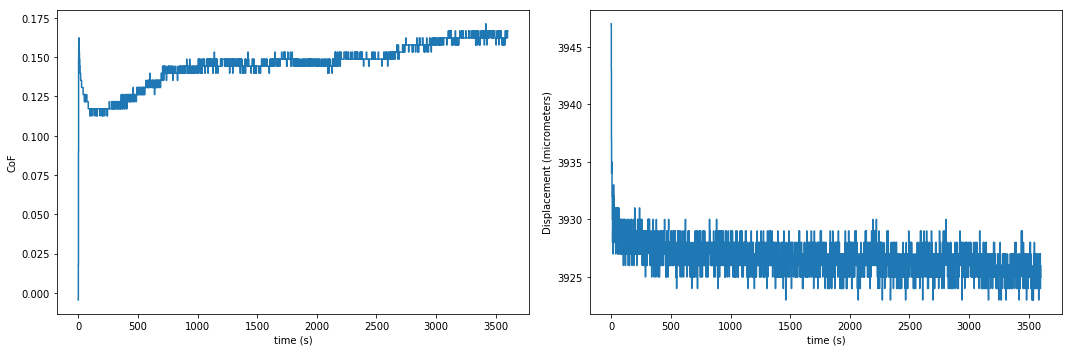

pod_data/PPS_100N_1.tsv


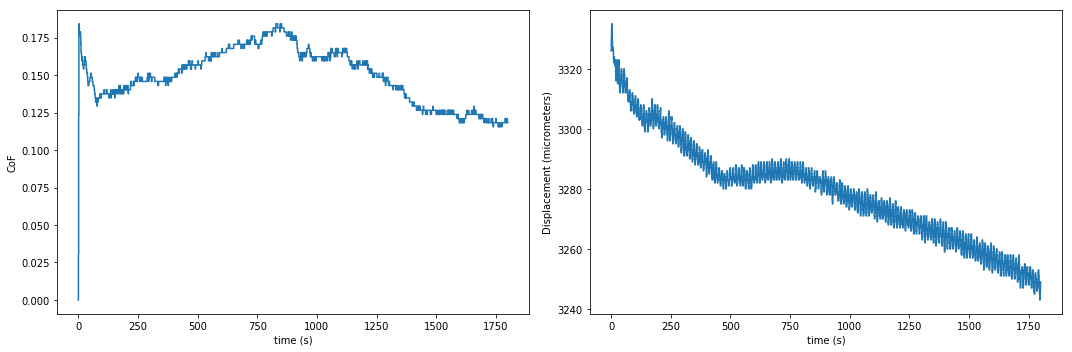

pod_data/PPS_60N_1.tsv


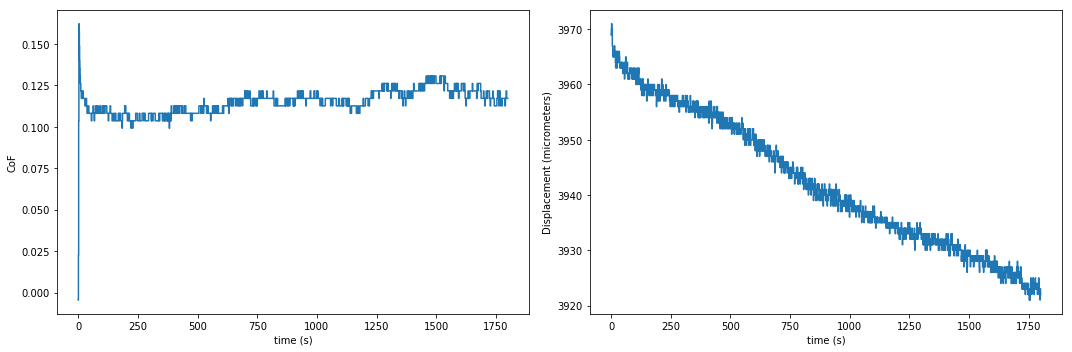

pod_data/PPS_60N_2.tsv


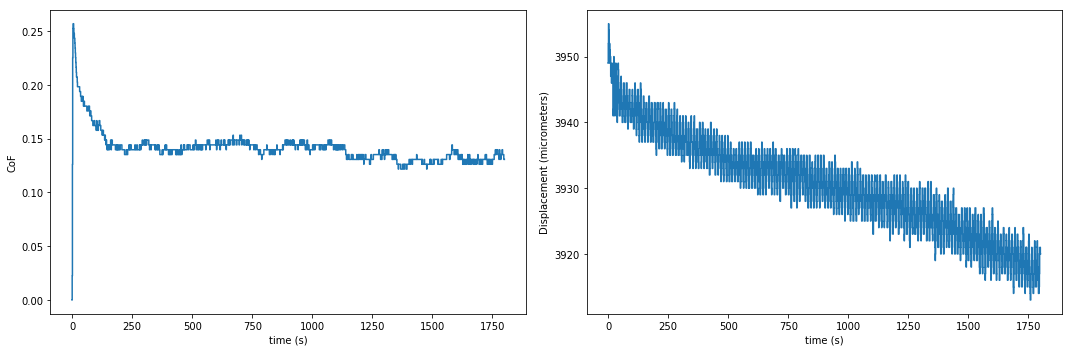

In [2]:
import glob
import numpy
import matplotlib.pyplot
import pandas as pd

def loadFile(file_name):
    """Loads CSV file into a dataframe and removes columns that are
    not needed for the friction and wear analysis as well as rows
    with empty values.
    file_name: name of the DataFrame to be cleaned"""
    
    df = pd.read_csv(file_name, sep='\t', decimal=",", skiprows=15)
    df = df[:-1]
    cleaned_file_name = df.drop(["Unnamed: 0", "Time", "This Step","Step Time", "Sliding Velocity", "Speed", "Mass", "TOTAL REVOLUTIONS", "Specimen Temp", "Contact Potential", "Radius", "Friction Force", "Friction Force.1","Unnamed: 18"], axis=1)
    
    return cleaned_file_name

def plotFigures(file_name):
    """Plots the CoF and Displacement over time"""
    fig = matplotlib.pyplot.figure(figsize=(15.0, 5.0))
    axes1 = fig.add_subplot(1, 2, 1)
    axes2 = fig.add_subplot(1, 2, 2)
    
    axes1.set_ylabel('CoF')
    axes1.set_xlabel('time (s)')
    axes1.plot(file_name["Friction Coefficient"], drawstyle='steps-mid');
    
    axes2.set_ylabel('Displacement (micrometers)')
    axes2.set_xlabel('time (s)')
    axes2.plot(file_name["Displacement"], drawstyle='steps-mid');
    
    fig.tight_layout()
    matplotlib.pyplot.show()
    
    
filenames = sorted(glob.glob('pod_data/PPS*.tsv')) # location of the POD files

for path in filenames:
    file = loadFile(path)
    print(path)
    plotFigures(file)